In [597]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
#read the titanic-passengers.csv file
df = pd.read_csv("titanic-passengers.csv", sep =';')
#show the head of the titanic-passengers file
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [598]:
#show the informations of the file
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [599]:
#check the sum of the missing values with isnull()
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [600]:
# replace the missing values in the differents columns
#replace the missing values of age by the mode()
df.fillna({'Age': df['Age'].mode()[0]}, inplace=True)
#replace the missing values of 'embarked' by the most represented value
#look fisrt 'Emarked' value_counts
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [601]:
#S is beingt the modalities the mos represented, we will replace the NAN by in the 'Embarked' category
df.fillna({'Embarked': df['Embarked'].mode()[0]}, inplace=True)

In [602]:
#the 'Cabin' column representing too many values for the distribution, we will done a larger grouping to be able 
#add dummies afterwards large pour pouvaoir aprés
#observation to values of  'Cabin'
df['Cabin'].value_counts()

G6             4
B96 B98        4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
D46            1
D56            1
C111           1
B50            1
A32            1
Name: Cabin, Length: 147, dtype: int64

In [603]:
#replace the missing values by a fictious value
df['Cabin'].fillna('X', inplace=True)
df['Cabin'].value_counts()

X              687
B96 B98          4
G6               4
C23 C25 C27      4
D                3
              ... 
D46              1
D56              1
C111             1
B50              1
A32              1
Name: Cabin, Length: 148, dtype: int64

In [604]:
#let's do grouping  terms of 'cabin' taking only the first caracter of each valuer
df['Cabin'] = df['Cabin'].str[0]

In [605]:
df['Cabin'].value_counts()

X    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [606]:
#let's categorize every 'Age' in one group
print('Min value of age: ', df['Age'].min())
print('Max age: ', df['Age'].max())

Min value of age:  0.42
Max age:  80.0


In [607]:
bins = [0, 5, 17, 25, 50, 80]
labels = ['Infant', 'Kid', 'Young', 'Adult', 'Old']
df['Age'] = pd.cut(df['Age'], bins = bins, labels=labels)

In [608]:
df['Age'].value_counts()

Young     365
Adult     349
Kid        69
Old        64
Infant     44
Name: Age, dtype: int64

In [609]:
#let's categorize every 'Fare' in one group
bins = [-1, 7.9101, 14.4542, 31, 512.330]
labels = ['low', 'medium-low', 'medium', 'heigh']
df['Fare'] = pd.cut(df['Fare'], bins = bins, labels = labels)

In [610]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,Adult,0,0,248740,medium-low,X,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,Young,0,0,348123,low,F,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,Young,0,0,350050,low,X,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,Adult,0,4,349909,medium,X,S
4,672,No,1,"Davidson, Mr. Thornton",male,Adult,1,0,F.C. 12750,heigh,B,S


In [611]:
dummies = ['Fare', 'Age', 'Sex']
dummy_data = pd.get_dummies(df[dummies])

In [612]:
df = pd.concat([df, dummy_data], axis=1)
df.drop(dummies, axis=1, inplace=True)

In [613]:
df.head()

,PassengerId,Survived,Pclass,Name,SibSp,Parch,Ticket,Cabin,Embarked,Fare_low,Fare_medium-low,Fare_medium,Fare_heigh,Age_Infant,Age_Kid,Age_Young,Age_Adult,Age_Old,Sex_female,Sex_male
0,343,No,2,"Collander, Mr. Erik Gustaf",0,0,248740,X,S,0,1,0,0,0,0,0,1,0,0,1
1,76,No,3,"Moen, Mr. Sigurd Hansen",0,0,348123,F,S,1,0,0,0,0,0,1,0,0,0,1
2,641,No,3,"Jensen, Mr. Hans Peder",0,0,350050,X,S,1,0,0,0,0,0,1,0,0,0,1
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,4,349909,X,S,0,0,1,0,0,0,0,1,0,1,0
4,672,No,1,"Davidson, Mr. Thornton",1,0,F.C. 12750,B,S,0,0,0,1,0,0,0,1,0,0,1


In [614]:
#encode our output variable
survived_title = {
    "Survived" : {
        "Yes" : 1,
        "No" : 0
    }
}
#replace the values of 'Survived' by the encoded variable
df.replace(survived_title, inplace=True)

In [615]:
df.head()

,PassengerId,Survived,Pclass,Name,SibSp,Parch,Ticket,Cabin,Embarked,Fare_low,Fare_medium-low,Fare_medium,Fare_heigh,Age_Infant,Age_Kid,Age_Young,Age_Adult,Age_Old,Sex_female,Sex_male
0,343,0,2,"Collander, Mr. Erik Gustaf",0,0,248740,X,S,0,1,0,0,0,0,0,1,0,0,1
1,76,0,3,"Moen, Mr. Sigurd Hansen",0,0,348123,F,S,1,0,0,0,0,0,1,0,0,0,1
2,641,0,3,"Jensen, Mr. Hans Peder",0,0,350050,X,S,1,0,0,0,0,0,1,0,0,0,1
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,4,349909,X,S,0,0,1,0,0,0,0,1,0,1,0
4,672,0,1,"Davidson, Mr. Thornton",1,0,F.C. 12750,B,S,0,0,0,1,0,0,0,1,0,0,1


In [616]:
#apply the decision tree with a training set and a testing set
Y = df['Survived']
#drop the columns 'Name' et 'Ticket' and work only on the other columns 
X = df.drop(columns = ['Survived', "Name", "Ticket", "Cabin", "Embarked"], axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 10)

[Text(167.4, 190.26, 'X[13] <= 0.032\ngini = 0.469\nsamples = 712\nvalue = [444, 268]'),
 Text(83.7, 135.9, 'X[1] <= 1.121\ngini = 0.296\nsamples = 460\nvalue = [377, 83]'),
 Text(41.85, 81.53999999999999, 'X[4] <= 0.085\ngini = 0.461\nsamples = 100\nvalue = [64, 36]'),
 Text(20.925, 27.180000000000007, 'gini = 0.471\nsamples = 95\nvalue = [59, 36]'),
 Text(62.775000000000006, 27.180000000000007, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(125.55000000000001, 81.53999999999999, 'X[8] <= 0.371\ngini = 0.227\nsamples = 360\nvalue = [313, 47]'),
 Text(104.625, 27.180000000000007, 'gini = 0.197\nsamples = 344\nvalue = [306, 38]'),
 Text(146.475, 27.180000000000007, 'gini = 0.492\nsamples = 16\nvalue = [7, 9]'),
 Text(251.10000000000002, 135.9, 'X[1] <= 2.009\ngini = 0.39\nsamples = 252\nvalue = [67, 185]'),
 Text(209.25, 81.53999999999999, 'X[7] <= 0.79\ngini = 0.1\nsamples = 133\nvalue = [7, 126]'),
 Text(188.32500000000002, 27.180000000000007, 'gini = 0.163\nsamples = 56\nvalue = [

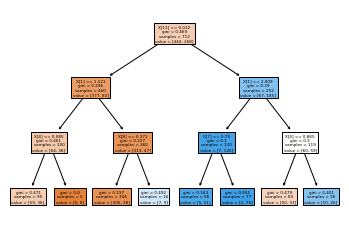

In [617]:
#plot our decision tree and try to read the tree branches and conclude a prediction manually
#make an instance of our model
decision_tree = tree.DecisionTreeClassifier(criterion = "gini", splitter = 'random', max_leaf_nodes = 10, min_samples_leaf=5,max_depth=3)
decision_tree.fit(X_train, Y_train)
tree.plot_tree(decision_tree, filled=True)
#dot_data = tree.export_graphviz(decision_tree, out_file=None)
#graph = graphviz.source(dot_data)
#graph.render('df')
#graph

In [618]:
#we can use the model for the prediction
Y_pred = decision_tree.predict(X_test)

In [619]:
#we can of the way calculate the score
print('Score = {}'.format(accuracy_score(Y_test, Y_pred)))

Score = 0.7932960893854749


[Text(147.96964285714287, 205.35999999999999, 'X[14] <= 0.5\ngini = 0.469\nsamples = 712\nvalue = [444, 268]'),
 Text(76.52571428571429, 181.2, 'X[1] <= 2.5\ngini = 0.39\nsamples = 252\nvalue = [67, 185]'),
 Text(38.26285714285714, 157.04, 'X[7] <= 0.5\ngini = 0.1\nsamples = 133\nvalue = [7, 126]'),
 Text(19.13142857142857, 132.88, 'X[0] <= 315.0\ngini = 0.163\nsamples = 56\nvalue = [5, 51]'),
 Text(9.565714285714286, 108.72, 'gini = 0.255\nsamples = 20\nvalue = [3, 17]'),
 Text(28.697142857142858, 108.72, 'gini = 0.105\nsamples = 36\nvalue = [2, 34]'),
 Text(57.394285714285715, 132.88, 'X[3] <= 0.5\ngini = 0.051\nsamples = 77\nvalue = [2, 75]'),
 Text(47.82857142857143, 108.72, 'gini = 0.0\nsamples = 44\nvalue = [0, 44]'),
 Text(66.96000000000001, 108.72, 'gini = 0.114\nsamples = 33\nvalue = [2, 31]'),
 Text(114.78857142857143, 157.04, 'X[4] <= 0.5\ngini = 0.5\nsamples = 119\nvalue = [60, 59]'),
 Text(105.22285714285715, 132.88, 'X[0] <= 400.0\ngini = 0.479\nsamples = 83\nvalue = [50,

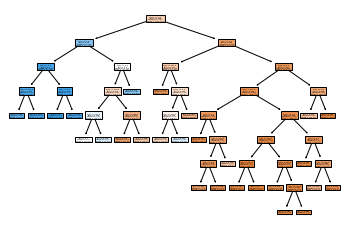

In [620]:
#change the decision tree parameters values
#let's changing the 'max_depth' and the min_samples_leaf
decision_tree = tree.DecisionTreeClassifier(max_depth=2)
decision_tree = tree.DecisionTreeClassifier(min_samples_leaf=20)
decision_tree.fit(X_train, Y_train)
tree.plot_tree(decision_tree, filled=True)

here is tree obtained with min_samples_leaf = 2 and max_depth = 20. it has more elements in the leaves, so fewer nodes and the tree is shallower

In [621]:
#calculate the new precision and compare it wit the previous results
Y_pred = decision_tree.predict(X_test)
print('Score = {}'.format(accuracy_score(Y_test, Y_pred)))

Score = 0.8044692737430168


We see that when we changed the parameters, the score also changed. 

In [623]:
#use the random forest
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
print('Accuracy = ', accuracy_score(Y_test, Y_pred))

Accuracy =  0.7988826815642458


In [624]:
#change the number of estimators
clf = RandomForestClassifier(n_estimators=200)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
print('Accuracy = ', accuracy_score(Y_test, Y_pred))

Accuracy =  0.8044692737430168


### comparison
we see that when we set the number of estimators to 200, we find the same accuracy as when we set the min_samples_leaf to 20